In [12]:
# Importando bibliotecas
import numpy as np
import random
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from Modules.Helper import Helper
from Modules.Solvers import Solvers
from Modules.Plotters import Plotters
import pandas as pd
from Modules.Equation import Equation

In [13]:
labels = ['A', 'B', "C", 'D', 'E', 'F', 'G', 'H', 'I', 'J']
df, max_data = Helper.load_data(filename='Data/GRN10_DATA.txt', labels=labels)
initial_conditions = np.array([df[label].iloc[0] for label in labels])
t_span = (df['t'].iloc[0], df['t'].iloc[-1])  # Intervalo de tempo para simulações
t_eval = np.array(df['t'])  # Ponto de avaliação dos dados temporais
original = np.array(df[labels]).T  # Dados originais

In [ ]:
# # Melhor Indivíduo CMAES
# coeffs={
#     'A': {
#         'J': {'n': 19.72509301258893, 'k': 0.5206758514113475, '-': True}, 
#         'tau': 1.375789134684469
#         }, 
#     'B': {
#         'E': {'n': 5.189878043566109, 'k': 0.5754831266614687, '-': False}, 
#         'tau': 1.4074283669383645
#         }, 
#     'C': {
#         'A': {'n': 3.441510247433408, 'k': 0.6625784952512888}, 
#         'B': {'n': 22.980176367907088, 'k': 1.2675123807509632}, 
#         'F': {'n': 15.426678656253328, 'k': 0.7557521656269088}, 
#         'tau': 1.3301597895492123
#         }, 
#     'D': {
#         'F': {'n': 5.71704404210993, 'k': 0.5193805408839007, '-': False}, 
#         'tau': 1.7281577235162313
#         }, 
#     'E': {
#         'J': {'n': 13.105583817133082, 'k': 0.504132731526863, '-': True}, 
#         'tau': 1.3543621018895355
#         }, 
#     'F': {
#         'A': {'n': 5.262571155020994, 'k': 0.6013869225085854, '-': False}, 'tau': 1.3911712095350162}, 
#     'G': {
#         'A': {'n': 7.579403994657755, 'k': 0.6010073667760679}, 
#         'B': {'n': 23.445605400915074, 'k': 1.5362449507851197}, 
#         'F': {'n': 10.084933976296922, 'k': 1.7636395138880596}, 
#         'tau': 2.058823473840616
#         }, 
#     'H': {
#         'F': {'n': 4.763664296540125, 'k': 0.5003211687201297, '-': False}, 
#         'tau': 1.6734547512710032
#         }, 
#     'I': {'G': {'n': 13.547910166303655, 'k': 0.42877832202955113}, 
#           'H': {'n': 27.7981916900904, 'k': 0.5046914293068021}, 
#           'tau': 4.997823762000716
#         }, 
#     'J': {'I': {'n': 2.5826355428260803, 'k': 0.20151153688524667, '-': False}, 
#           'tau': 2.045689011192476
#         }
#     }


In [18]:
# Melhor Indivíduo DE

coeffs={
    'A': {
        'J': {'n': 16.735062768076546, 'k': 0.5195672496802001, '-': True}, 
        'tau': 1.3313484293121889
        }, 
    'B': {
        'E': {'n': 5.892035893847705, 'k': 0.56185577723736, '-': False}, 
        'tau': 1.1646262779920744
        }, 
    'C': {
        'A': {'n': 6.302272191220579, 'k': 0.592770083801452}, 
        'B': {'n': 2.688041088562578, 'k': 1.4474743663773846}, 
        'F': {'n': 19.782855309477494, 'k': 1.0081731988907496}, 
        'tau': 2.2247391498882436
        }, 
    'D': {
        'F': {'n': 3.5163485802977164, 'k': 0.5127408808558371, '-': False}, 
        'tau': 2.042531582595676
        }, 
    'E': {
        'J': {'n': 13.295280382028865, 'k': 0.5164646003633258, '-': True}, 
        'tau': 1.3473938287695506
        }, 
    'F': {
        'A': {'n': 5.66425303521749, 'k': 0.5951204530993999, '-': False}, 
        'tau': 1.1416418432160862
        }, 
    'G': {
        'A': {'n': 12.16494064811107, 'k': 0.6267963016790192}, 
        'B': {'n': 21.73784121714325, 'k': 1.0098755426636479}, 
        'F': {'n': 14.684130324201046, 'k': 0.8039980199355551}, 
        'tau': 2.537781475799267
        }, 
    'H': {
        'F': {'n': 13.702054501881186, 'k': 0.5536166322550815, '-': False}, 
        'tau': 2.2667446219719136
        }, 
    'I': {
        'G': {'n': 25.734902382667556, 'k': 0.49981949089375133}, 
        'H': {'n': 21.140532402032097, 'k': 0.5088472097221518}, 
        'tau': 4.400549756040132
        }, 
    'J': {
        'I': {'n': 2.1609738495930717, 'k': 0.1739851385771093, '-': False}, 
        'tau': 2.30842854959062
        }
    }


In [19]:
equation = Equation(coefficients=coeffs, labels=labels)

def system(t, y, equation):
        vals = [Solvers.norm_hardcoded(val, max_data[label]) for val, label in zip(y, labels)]
        N_A, N_B, N_C, N_D, N_E, N_F, N_G, N_H, N_I, N_J = vals

        dA = equation.full_eq(vals, 'A', 'J')
        dB = equation.full_eq(vals, 'B', 'E')
        dC = equation.complex_eqs(vals, 'C', [
                    ['+B', '-F', '-A'], 
                    ['-B', '+F', '-A'],
                    ['-B', '-F', '+A'],
                    ['+B', '-F', '+A'],
                    ['-B', '+F', '+A'],
                    ['+B', '+F', '+A'],
        ])
        dD = equation.full_eq(vals, 'D', 'F')
        dE = equation.full_eq(vals, 'E', 'J')
        dF = equation.full_eq(vals, 'F', 'A')
        dG = equation.complex_eqs(vals, 'G', [
                    ['+B', '-F', '-A'],
                    ['-B', '+F', '-A'],
                    ['-B', '-F', '+A'],
                    ['+B', '-F', '+A'],
                    ['-B', '+F', '+A'],
                    ['+B', '+F', '+A'] 
        ])
        dH = equation.full_eq(vals, 'H', 'F')
        dI = equation.complex_eqs(vals, 'I', [['+G', '+H']])
        dJ = equation.full_eq(vals, 'J', 'I')

        return [dA, dB, dC, dD, dE, dF, dG, dH, dI, dJ]

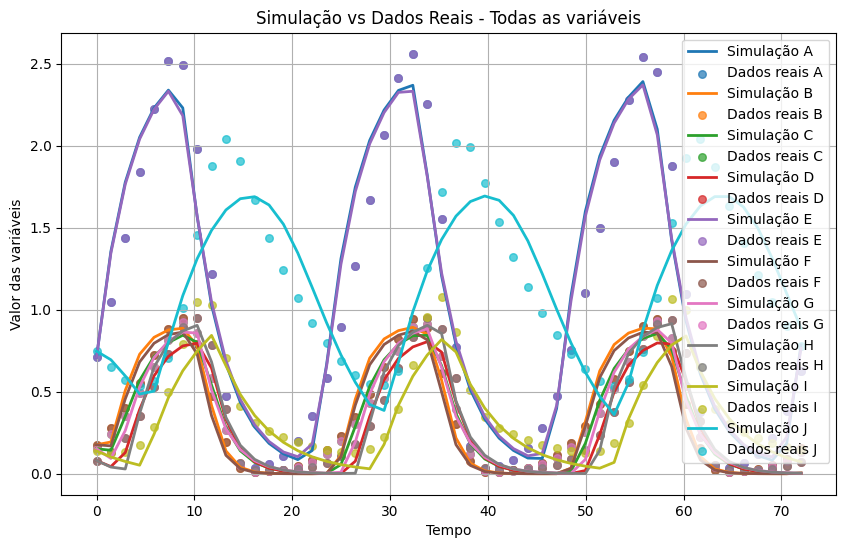

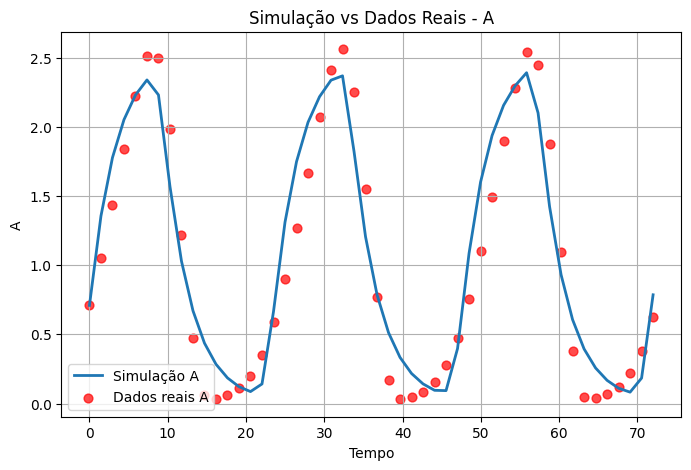

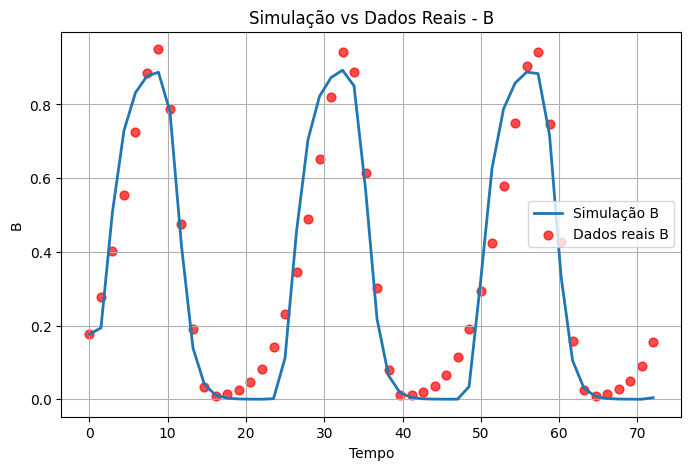

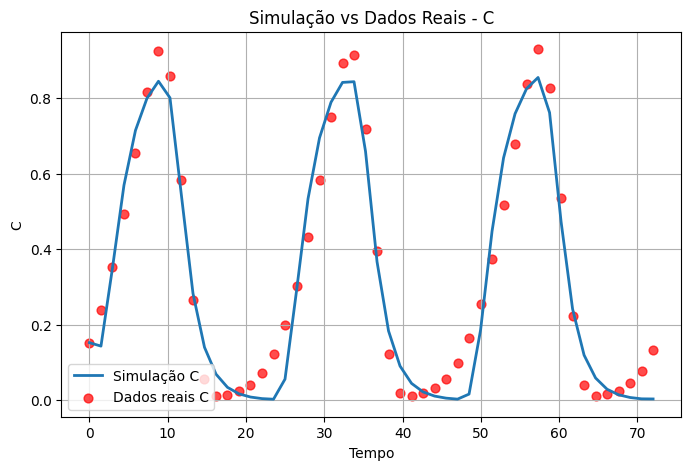

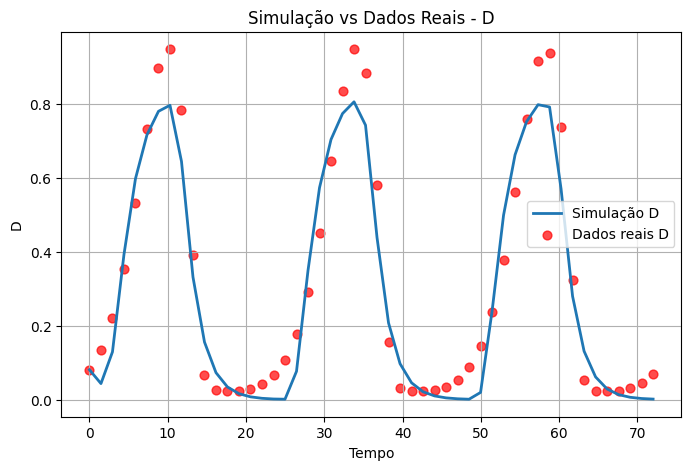

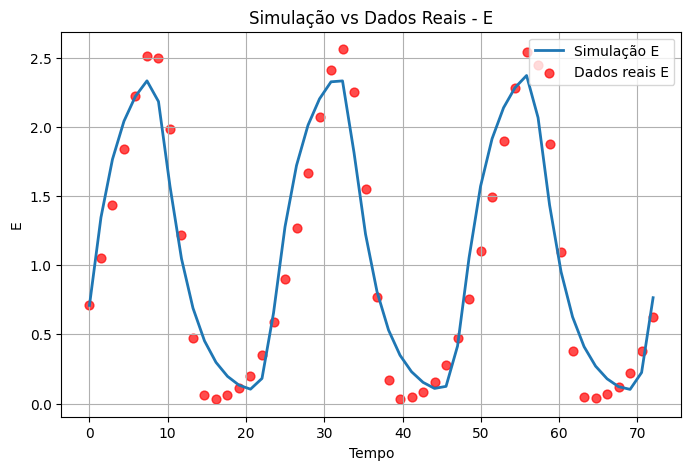

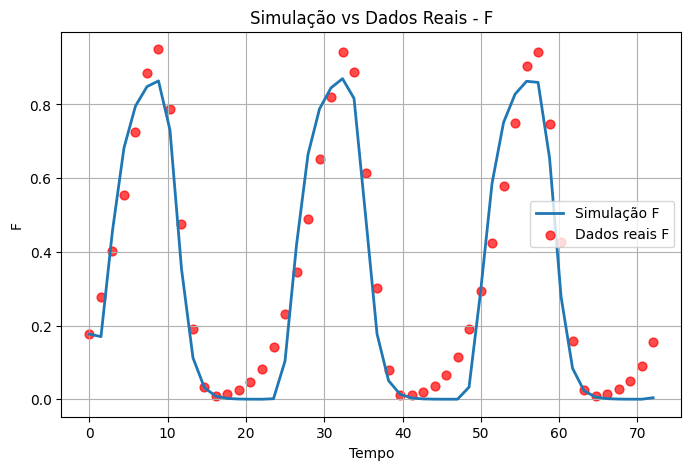

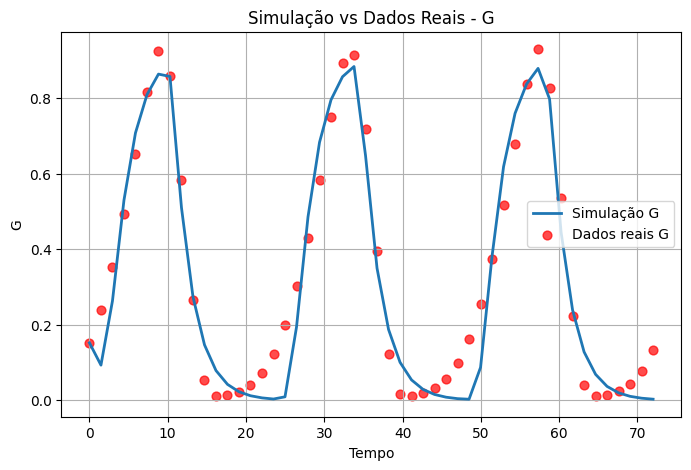

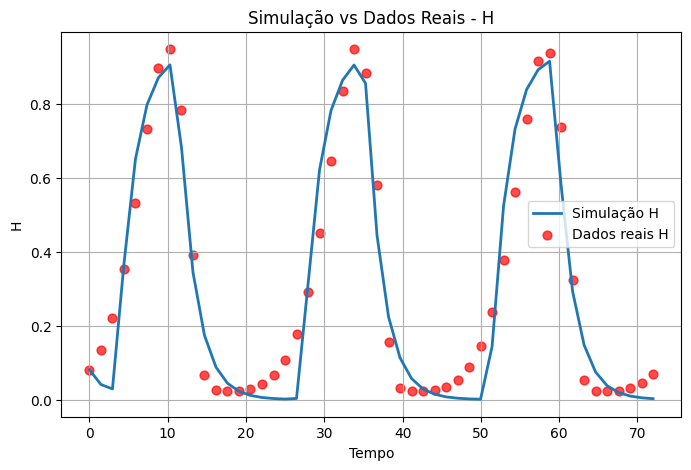

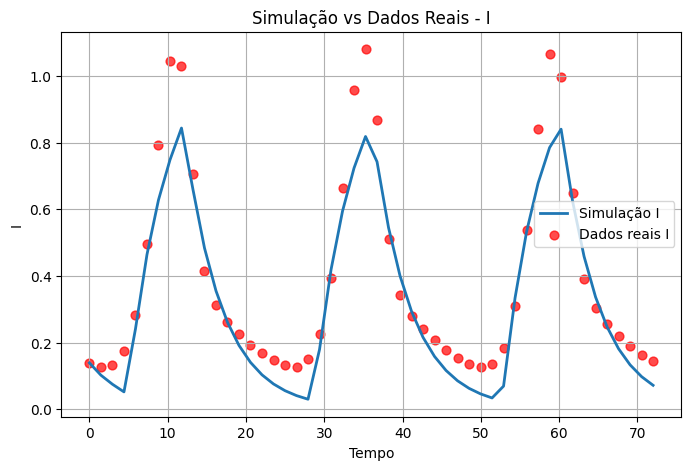

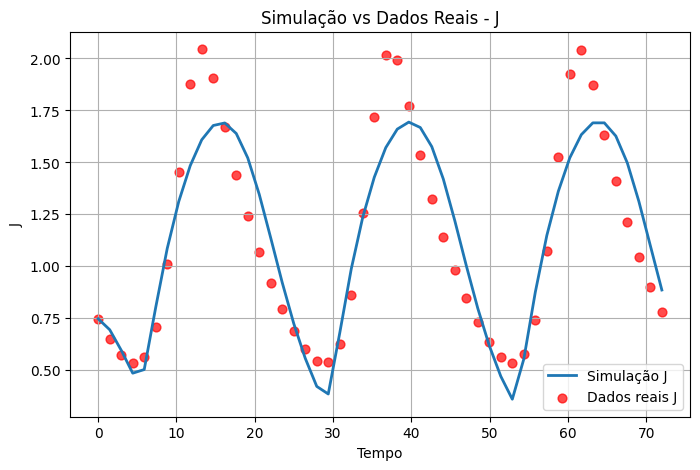

In [20]:
results = {}
methods = ['RK45']

for method in methods:
    results[method] = solve_ivp(
        system, t_span, initial_conditions,
        method=method, t_eval=t_eval, args=(equation,)
    ).y
    
    # --------- Gráfico com todas as curvas juntas ---------
    plt.figure(figsize=(10, 6))
    for i, label in enumerate(labels):
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.7)
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel("Valor das variáveis")
    plt.title(f"Simulação vs Dados Reais - Todas as variáveis")
    plt.grid(True)
    plt.show()

    # --------- Gráfico individual para cada curva ---------
    for i, label in enumerate(labels):
        plt.figure(figsize=(8, 5))
        plt.plot(t_eval, results[method][i], label=f'Simulação {label}', linewidth=2)
        plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=40, alpha=0.7, color="red")
        plt.legend()
        plt.xlabel("Tempo")
        plt.ylabel(f"{label}")
        plt.title(f"Simulação vs Dados Reais - {label}")
        plt.grid(True)
        plt.show()


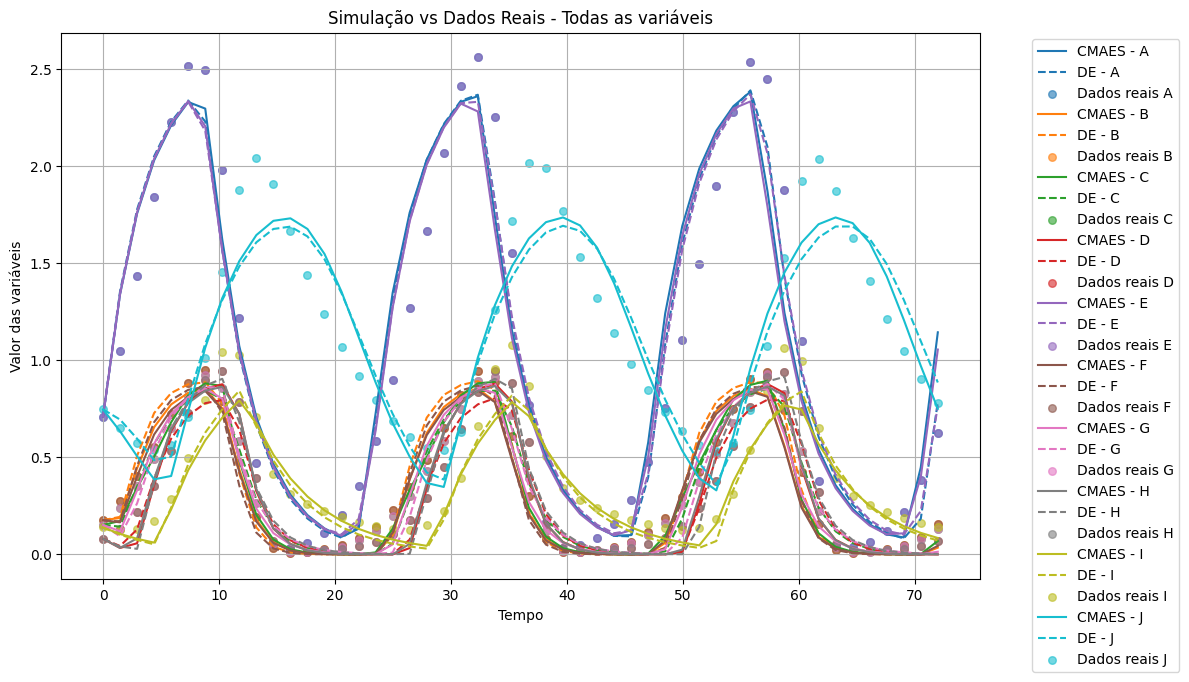

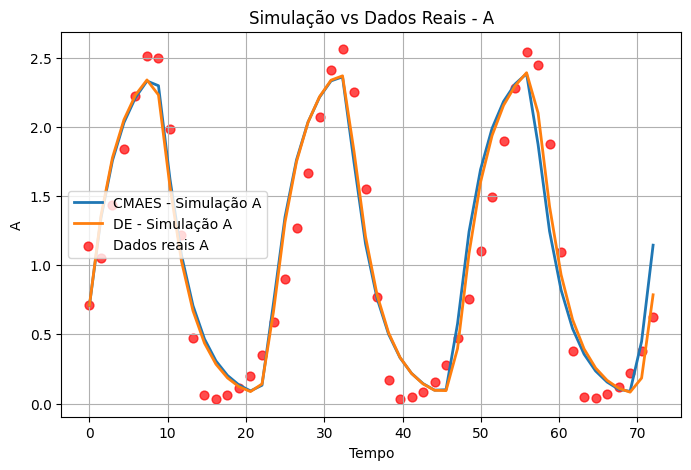

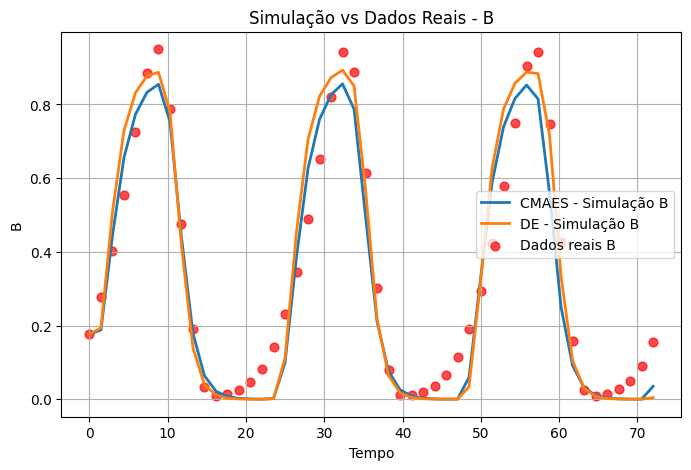

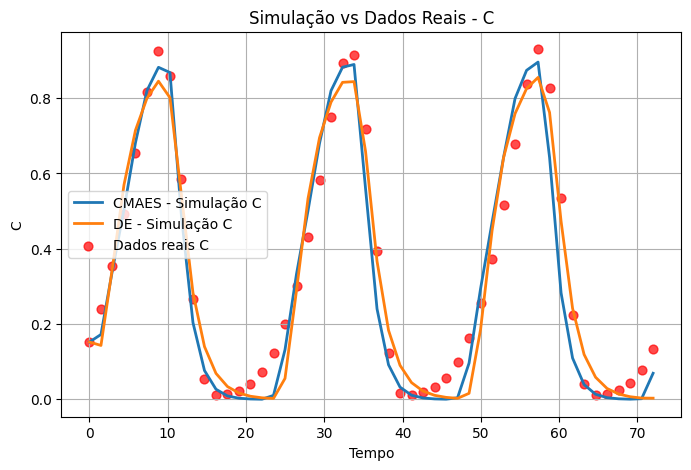

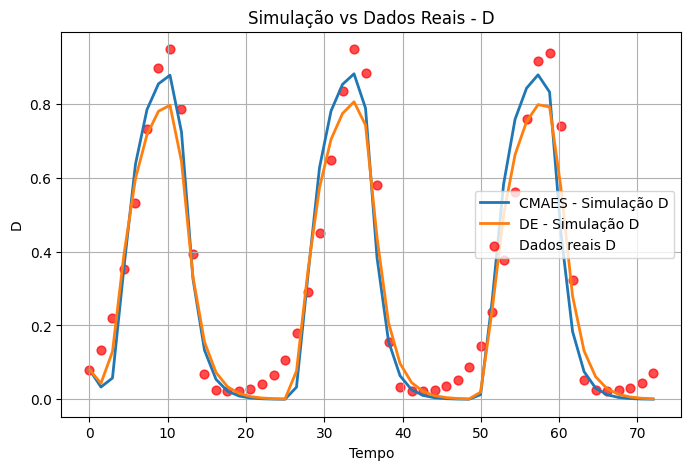

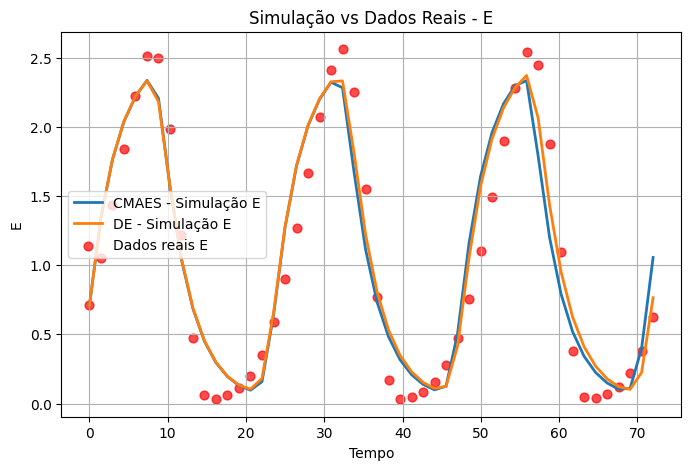

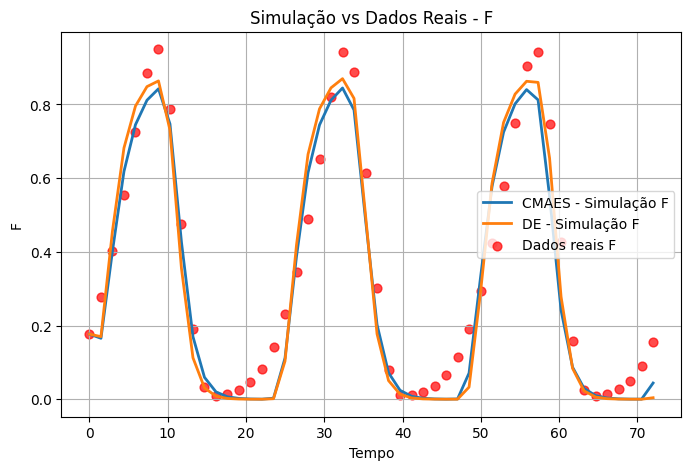

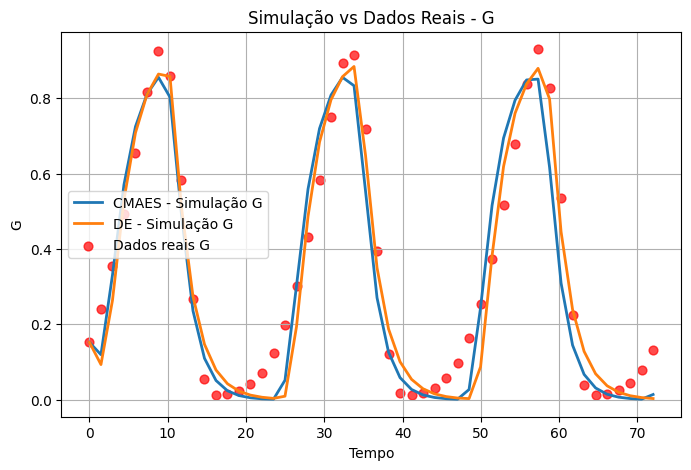

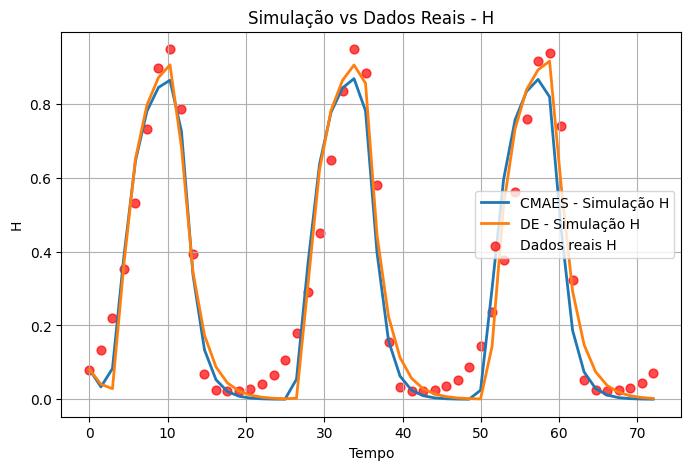

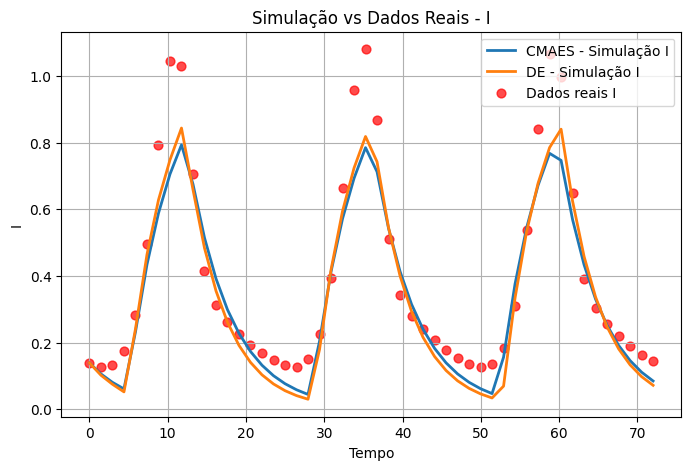

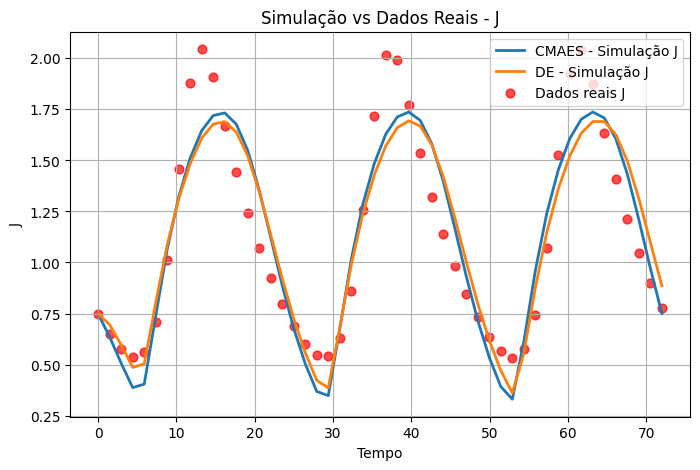

In [23]:
# Dicionário com os dois conjuntos de coeficientes
coeffs_dict = {
    "CMAES": {
        'A': {'J': {'n': 19.72509301258893, 'k': 0.5206758514113475, '-': True}, 'tau': 1.375789134684469}, 
        'B': {'E': {'n': 5.189878043566109, 'k': 0.5754831266614687, '-': False}, 'tau': 1.4074283669383645}, 
        'C': {'A': {'n': 3.441510247433408, 'k': 0.6625784952512888}, 'B': {'n': 22.980176367907088, 'k': 1.2675123807509632}, 'F': {'n': 15.426678656253328, 'k': 0.7557521656269088}, 'tau': 1.3301597895492123}, 
        'D': {'F': {'n': 5.71704404210993, 'k': 0.5193805408839007, '-': False}, 'tau': 1.7281577235162313}, 
        'E': {'J': {'n': 13.105583817133082, 'k': 0.504132731526863, '-': True}, 'tau': 1.3543621018895355}, 
        'F': {'A': {'n': 5.262571155020994, 'k': 0.6013869225085854, '-': False}, 'tau': 1.3911712095350162}, 
        'G': {'A': {'n': 7.579403994657755, 'k': 0.6010073667760679}, 'B': {'n': 23.445605400915074, 'k': 1.5362449507851197}, 'F': {'n': 10.084933976296922, 'k': 1.7636395138880596}, 'tau': 2.058823473840616}, 
        'H': {'F': {'n': 4.763664296540125, 'k': 0.5003211687201297, '-': False}, 'tau': 1.6734547512710032}, 
        'I': {'G': {'n': 13.547910166303655, 'k': 0.42877832202955113}, 'H': {'n': 27.7981916900904, 'k': 0.5046914293068021}, 'tau': 4.997823762000716}, 
        'J': {'I': {'n': 2.5826355428260803, 'k': 0.20151153688524667, '-': False}, 'tau': 2.045689011192476}
    },
    "DE": {
        'A': {'J': {'n': 16.735062768076546, 'k': 0.5195672496802001, '-': True}, 'tau': 1.3313484293121889}, 
        'B': {'E': {'n': 5.892035893847705, 'k': 0.56185577723736, '-': False}, 'tau': 1.1646262779920744}, 
        'C': {'A': {'n': 6.302272191220579, 'k': 0.592770083801452}, 'B': {'n': 2.688041088562578, 'k': 1.4474743663773846}, 'F': {'n': 19.782855309477494, 'k': 1.0081731988907496}, 'tau': 2.2247391498882436}, 
        'D': {'F': {'n': 3.5163485802977164, 'k': 0.5127408808558371, '-': False}, 'tau': 2.042531582595676}, 
        'E': {'J': {'n': 13.295280382028865, 'k': 0.5164646003633258, '-': True}, 'tau': 1.3473938287695506}, 
        'F': {'A': {'n': 5.66425303521749, 'k': 0.5951204530993999, '-': False}, 'tau': 1.1416418432160862}, 
        'G': {'A': {'n': 12.16494064811107, 'k': 0.6267963016790192}, 'B': {'n': 21.73784121714325, 'k': 1.0098755426636479}, 'F': {'n': 14.684130324201046, 'k': 0.8039980199355551}, 'tau': 2.537781475799267}, 
        'H': {'F': {'n': 13.702054501881186, 'k': 0.5536166322550815, '-': False}, 'tau': 2.2667446219719136}, 
        'I': {'G': {'n': 25.734902382667556, 'k': 0.49981949089375133}, 'H': {'n': 21.140532402032097, 'k': 0.5088472097221518}, 'tau': 4.400549756040132}, 
        'J': {'I': {'n': 2.1609738495930717, 'k': 0.1739851385771093, '-': False}, 'tau': 2.30842854959062}
    }
}

# Rodar as simulações para cada conjunto
results = {}
for name, coeffs in coeffs_dict.items():
    equation = Equation(coefficients=coeffs, labels=labels)
    sol = solve_ivp(
        system, t_span, initial_conditions,
        method="RK45", t_eval=t_eval, args=(equation,)
    )
    results[name] = sol.y

# --------- Gráfico com todas as curvas juntas (CMAES contínuo, DE tracejado) ---------
# plt.figure(figsize=(12, 7))
# for i, label in enumerate(labels):
#     for name, sol in results.items():
#         if name == "CMAES":
#             linestyle = '-'   # linha contínua
#         else:
#             linestyle = '--'  # linha tracejada
#         plt.plot(t_eval, sol[i], label=f'{name} - {label}', linestyle=linestyle)
#     # Dados reais
#     plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.5)
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# plt.xlabel("Tempo")
# plt.ylabel("Valor das variáveis")
# plt.title("Simulação vs Dados Reais - Todas as variáveis")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

import matplotlib.pyplot as plt

# Paleta discreta com cores bem distintas
palette = plt.get_cmap("tab10").colors  # até 10 cores bem diferentes
# Se tiver mais que 10 labels, dá pra usar "tab20" ou misturar paletas

# --------- Gráfico com todas as curvas juntas ---------
plt.figure(figsize=(12, 7))
for i, label in enumerate(labels):
    color = palette[i % len(palette)]  # garante repetição caso tenha >10 labels

    # CMAES (linha contínua)
    plt.plot(t_eval, results["CMAES"][i], label=f'CMAES - {label}', linestyle='-', color=color)

    # DE (linha tracejada)
    plt.plot(t_eval, results["DE"][i], label=f'DE - {label}', linestyle='--', color=color)

    # Dados reais (pontos)
    plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=30, alpha=0.6, color=color)

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xlabel("Tempo")
plt.ylabel("Valor das variáveis")
plt.title("Simulação vs Dados Reais - Todas as variáveis")
plt.grid(True)
plt.tight_layout()
plt.show()


# --------- Gráfico individual para cada curva ---------
for i, label in enumerate(labels):
    plt.figure(figsize=(8, 5))
    for name, sol in results.items():
        plt.plot(t_eval, sol[i], label=f'{name} - Simulação {label}', linewidth=2)
    plt.scatter(df['t'], df[label], label=f'Dados reais {label}', marker='o', s=40, alpha=0.7, color="red")
    plt.legend()
    plt.xlabel("Tempo")
    plt.ylabel(f"{label}")
    plt.title(f"Simulação vs Dados Reais - {label}")
    plt.grid(True)
    plt.show()
